In [53]:
import sys
sys.path.append('../')

In [54]:
import pandas as pd
import numpy as np
from utils.perceptron import build_step_perceptron, build_perceptron
from utils.activation_functions import step_activation

In [55]:
and_df = pd.DataFrame(data={
    "in_1" : [-1, -1,  1,  1],
    "in_2" : [-1,  1, -1,  1],
    "out"  : [-1, -1, -1,  1]
})

In [56]:
and_df

,in_1,in_2,out
0,-1,-1,-1
1,-1,1,-1
2,1,-1,-1
3,1,1,1


In [57]:
p, errors, init_w = build_step_perceptron(and_df, "out", 0.001, iters=None)

In [58]:
p.type

'step'

In [59]:
predicted = and_df[["in_1", "in_2"]].apply(p.predict, axis="columns")
predicted

0   -1
1   -1
2   -1
3    1
dtype: int64

In [60]:
O = p.predict(and_df[["in_1", "in_2"]].iloc[0])
O

-1

In [61]:
line_x = np.linspace(-5, 5, 20, True)
line_x

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [62]:
line_y = np.zeros(line_x.shape)
for i in range(line_x.shape[0]):
    line_y[i] = -(p.w[0][0]/p.w[0][1])*line_x[i] - (p.w[0][2]/p.w[0][1])
line_y 

array([1.43919796, 1.38159986, 1.32400176, 1.26640365, 1.20880555,
       1.15120745, 1.09360935, 1.03601125, 0.97841315, 0.92081505,
       0.86321695, 0.80561885, 0.74802075, 0.69042265, 0.63282455,
       0.57522645, 0.51762835, 0.46003025, 0.40243215, 0.34483405])

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

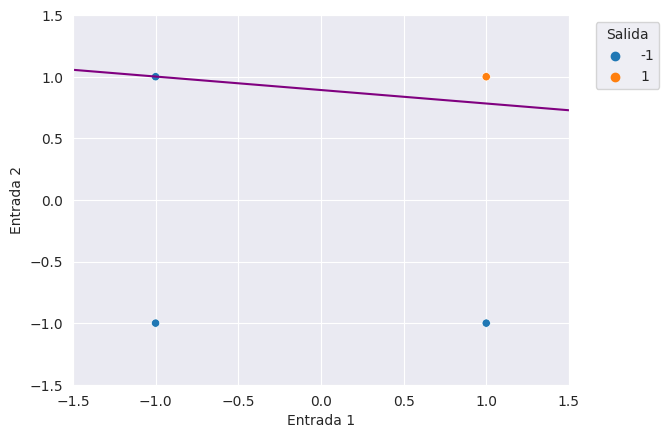

In [64]:
sns.set_style("darkgrid")
sns.scatterplot(and_df, x="in_1", y="in_2", hue="out", palette=sns.color_palette(None, 2))
plt.plot(line_x, line_y, color="purple")
plt.ylim((-1.5, 1.5))
plt.xlim((-1.5, 1.5))
plt.xlabel("Entrada 1")
plt.ylabel("Entrada 2")
plt.legend(title="Salida", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

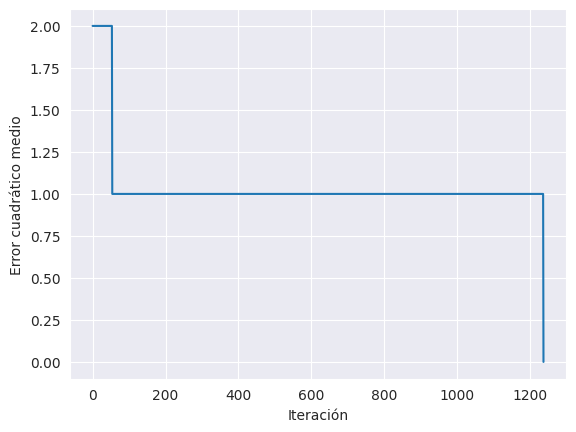

In [65]:
sns.set_style("darkgrid")
plt.plot(list(range(len(errors))), errors)
plt.xlabel("Iteración")
plt.ylabel("Error cuadrático medio")
plt.show()